<a href="https://colab.research.google.com/github/Dmitriy6655/-python-DS-ITOGOVAYA/blob/main/Sem2_Machine_learning(Lin_regressiya).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Метод наименьших квадратов

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
x=np.array([1,2,3,4,5])
y=np.array([1,2,3,4,5])
y1=np.array([1,2,3,4,5])
y2=np.array([1,1,4,9,0])


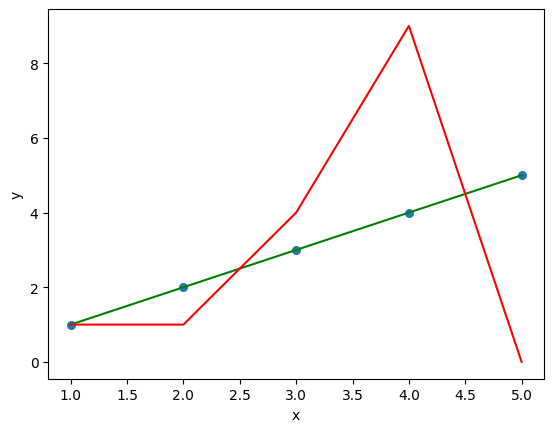

In [5]:
plt.scatter(x, y, s=30)
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
error1=sum(y1-y)
error2=sum(y2-y)
print(error1)
print(error2)

0
0


In [9]:
error1=sum((y1-y)**2)
error2=sum((y2-y)**2)
print(error1)
print(error2)

0
52


###Пример 2

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #метод для раздления выборки
from sklearn.linear_model import LinearRegression #объект линейной ргрессии

In [18]:
np. random.seed(0)
x= np.random.rand(1000,1)
y=1+4*x+np.random.rand(1000,1)

d={'x':x.reshape(1,1000)[0],'y':y.reshape(1,1000)[0]}
df=pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,3.788134
1,0.715189,3.870821
2,0.602763,3.886880
3,0.544883,3.888303
4,0.423655,2.738595


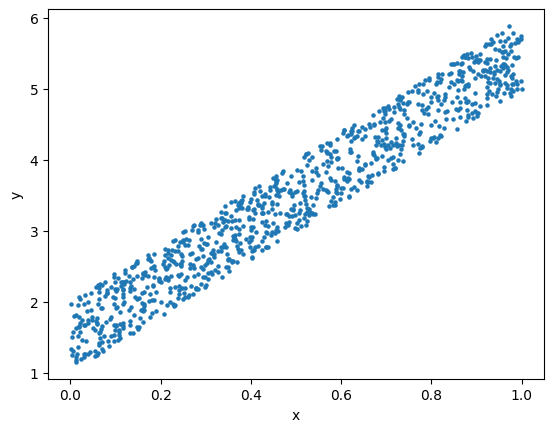

In [21]:
plt.scatter(df['x'],df['y'], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Теперь найдем зависимость при помощи линейной регрессии, для этого поделим нашу выборку на обучающую(70% данных ) и тестовую(30% данных).